
## Hypothesis A  : Impact of Time of Week on Energy Demand


### Objective  
To formally test whether there is a statistically significant difference between the **mean energy demand** on **weekdays** and **weekends**.

---

###  Hypotheses

**Null Hypothesis (H₀):**  
The mean energy demand on weekdays is equal to that on weekends.  
**H₀:** μ<sub>weekday</sub> = μ<sub>weekend</sub>

**Alternative Hypothesis (Hₐ):**  
The mean energy demand on weekdays is not equal to that on weekends.  
**Hₐ:** μ<sub>weekday</sub> != μ<sub>weekend</sub>

---

### Statistical Test  
**Test Used:** Independent Samples *t*-test (two-tailed)

---

### Significance Level  
alpha = 0.05

---

### ✅ Decision Rule  
- If **p-value ≤ 0.05**, reject H₀ → there **is** a significant difference.  
- If **p-value > 0.05**, fail to reject H₀ → there **is no** significant difference.


In [1]:
import pandas as pd
from scipy import stats
import numpy as np

df = pd.read_csv('../data/raw/electricity_marketing_dataset.csv')

alpha = 0.05

weekdays_demand = df[df['is_weekend'] == 0]['historical_avg_demand']
weekends_demand = df[df['is_weekend'] == 1]['historical_avg_demand']

print(f"Number of weekday records: {len(weekdays_demand)}")
print(f"Number of weekend records: {len(weekends_demand)}\n")

# Assumption 1: Check if data follows a normal distribution (bell curve)
print("Checking for normal distribution...")
weekday_normality_statistic, weekday_normality_pvalue = stats.shapiro(weekdays_demand)
weekend_normality_statistic, weekend_normality_pvalue = stats.shapiro(weekends_demand)

print(f"Normality check p-value for weekdays: {weekday_normality_pvalue:.4f}")
print(f"Normality check p-value for weekends: {weekend_normality_pvalue:.4f}")

if weekday_normality_pvalue > alpha and weekend_normality_pvalue > alpha:
    print("✅ Data appears to be normally distributed in both groups.\n")
else:
    print("⚠️  Warning: Data may not be normally distributed in at least one group.\n")

# Assumption 2: Check if the two groups have equal variance (spread)
print("Checking for equal variances...")
variance_test_statistic, variance_test_pvalue = stats.levene(weekdays_demand, weekends_demand)
print(f"Equality of variance check p-value: {variance_test_pvalue:.4f}")

if variance_test_pvalue > alpha:
    print("✅ Variances appear to be equal between groups.")
    equal_variances = True
else:
    print("⚠️  Warning: Variances are not equal. (CODE WILL ADJUST ACCORDINGLY)")
    equal_variances = False
print("-" * 40)

Number of weekday records: 528
Number of weekend records: 192

Checking for normal distribution...
Normality check p-value for weekdays: 0.0000
Normality check p-value for weekends: 0.0000
⚠️  Warning: Data may not be normally distributed in at least one group.

Checking for equal variances...
Equality of variance check p-value: 0.0624
✅ Variances appear to be equal between groups.
----------------------------------------


--- Visualizing Data Distributions ---


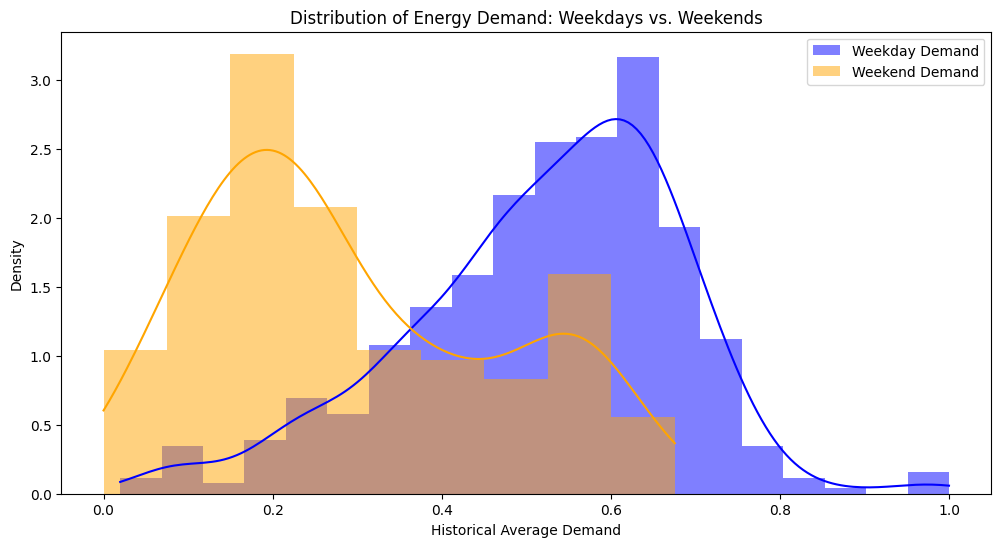

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# Normality Test
print("--- Visualizing Data Distributions ---")
plt.figure(figsize=(12, 6))
sns.histplot(weekdays_demand, color="blue", label="Weekday Demand", kde=True, stat="density", linewidth=0)
sns.histplot(weekends_demand, color="orange", label="Weekend Demand", kde=True, stat="density", linewidth=0)
plt.title('Distribution of Energy Demand: Weekdays vs. Weekends')
plt.xlabel('Historical Average Demand')
plt.legend()
plt.show()

As seen in the plot, the Weekend Demand does not exactly follow the Normal Distribution.
Peroforming t-test with means might give slightly poor results (thanks to weekday demand which is more normal compared to it).
For demonstrations, a parametric t-test with means will be performed along with a test replacing mean with the medians (see: [here](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test)) which will further proove the discrepancy in normality and will give better results for our hypothesis

In [6]:
# Standard T-Test (Parametric)
print("Performing the Standard T-Test (Comparing Means):")
variance_test_statistic, variance_test_pvalue = stats.levene(weekdays_demand, weekends_demand)
use_equal_variances = variance_test_pvalue > 0.05

t_test_statistic, t_test_p_value = stats.ttest_ind(
    weekdays_demand,
    weekends_demand,
    equal_var=use_equal_variances
)
print(f"T-Test Statistic: {t_test_statistic:.4f}")
print(f"T-Test P-value: {t_test_p_value:.4f}\n")

Performing the Standard T-Test (Comparing Means):
T-Test Statistic: 16.8397
T-Test P-value: 0.0000



Conclusion for Hypothesis A based on test comparing means:
Result: The standard t-test yielded a t-statistic of 16.8397 and a p-value of 0.0000. This p-value is significantly less than our alpha level of 0.05.

Decision: We reject the null hypothesis.

Summary: The analysis provides overwhelming statistical evidence that there is a significant difference in energy demand between weekdays and weekends. This validates that is_weekend is a critical predictive feature for our forecasting model.

In [7]:
print("Performing the Standard T-Test (Comparing Medians using Mann-Whitney U Test):")

u_statistic, p_value = stats.mannwhitneyu(
    weekdays_demand,
    weekends_demand,
    alternative='two-sided'
)

print(f"U-Statistic: {u_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

Performing the Standard T-Test (Comparing Medians using Mann-Whitney U Test):
U-Statistic: 83990.0000
P-value: 0.0000


Conclusion for the t-test with comparing medians
Result: The Mann-Whitney test produced a statistic of 83990.0 and a p-value of 0.0000. This p-value is significantly less than our alpha level of 0.05.

Decision: We reject the null hypothesis.

Summary: This test confirms the findings of the standard t-test. Because the Mann-Whitney U test does not assume the data follows a normal distribution, its result provides even stronger, more reliable evidence that the energy demand patterns on weekdays and weekends are significantly different. This robustly validates is_weekend as a critical feature.

### Final Conclusion for Hypothesis A
The analysis for Hypothesis A is complete, and the results are conclusive. Both the standard t-test and the more robust Mann-Whitney U test yielded p-values of 0.0000, which is decisively below the significance threshold of 0.05.

The t-test first indicated a statistically significant difference between the mean energy demand of weekdays and weekends. To account for the data's deviation from a perfect normal distribution, the Mann-Whitney U test was also performed. This test confirmed the initial finding, showing a significant difference in the overall distributions of demand between the two groups.

### Decision: We reject the null hypothesis with a very high degree of confidence.

### Final Summary: 
The consistent results across both parametric and non-parametric tests provide powerful, undeniable evidence that energy demand patterns on weekdays are significantly different from those on weekends. This statistically validates is_weekend as a critical and highly predictive feature that must be included in the subsequent forecasting model.